In [12]:
!pip install PyWavelets

In [10]:
!pip install --upgrade pip

  Using cached pip-23.1.2-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 21.0.1
    Uninstalling pip-21.0.1:
      Successfully uninstalled pip-21.0.1


In [11]:
!pip install opencv-python

     -------------------------------------- 38.2/38.2 MB 160.5 kB/s eta 0:00:00


In [8]:
!pip install seaborn==0.8.1

  Created wheel for seaborn: filename=seaborn-0.8.1-py3-none-any.whl size=184833 sha256=94fb22bab6b52ea4dd8b29ee052c023de671eaaf99ac2a339b07b36741e846d5
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\18\48\9b\39ac10dbe8ed3a4883283aed441a765239b3cc7c94ed5a2040
Successfully built seaborn
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.1
    Uninstalling seaborn-0.11.1:
      Successfully uninstalled seaborn-0.11.1


In [13]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [14]:
img = cv2.imread('./test_images/taylor_swift.webp')
img.shape

(380, 285, 3)

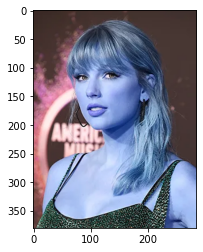

In [15]:
plt.imshow(img)

In [16]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(380, 285)

In [17]:
gray

array([[ 41,  41,  41, ...,  49,  48,  48],
       [ 41,  41,  41, ...,  49,  48,  48],
       [ 41,  41,  41, ...,  49,  48,  48],
       ...,
       [ 60,  65,  71, ..., 205, 205, 205],
       [ 57,  62,  68, ..., 205, 205, 205],
       [ 54,  59,  65, ..., 205, 205, 205]], dtype=uint8)

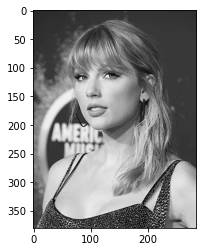

In [18]:
plt.imshow(gray, cmap='gray')

In [22]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

()

In [21]:
(x,y,w,h) = faces[0]
x,y,w,h

IndexError: tuple index out of range

In [26]:
img1 = cv2.imread('./test_images/charlie-puth-2015-billboard-650_0.webp')
img1.shape

(430, 650, 3)

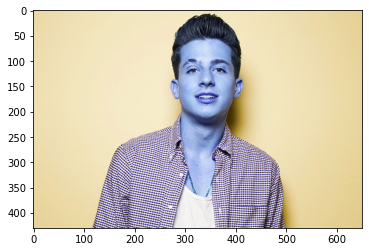

In [28]:
plt.imshow(img1)

In [29]:
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray1.shape

(430, 650)

In [30]:
gray1

array([[204, 203, 203, ..., 192, 192, 192],
       [204, 203, 203, ..., 192, 192, 192],
       [204, 203, 203, ..., 193, 192, 192],
       ...,
       [193, 195, 195, ..., 185, 185, 185],
       [194, 194, 194, ..., 186, 187, 187],
       [193, 197, 196, ..., 186, 186, 186]], dtype=uint8)

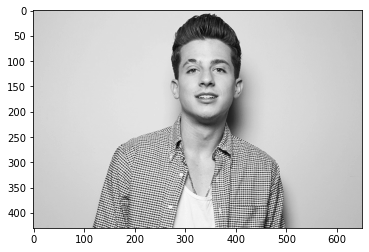

In [33]:
plt.imshow(gray1, cmap='gray')

In [34]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray1, 1.3, 5)
faces

array([[268,  57, 150, 150]])

In [35]:
(x,y,w,h) = faces[0]
x,y,w,h

(268, 57, 150, 150)

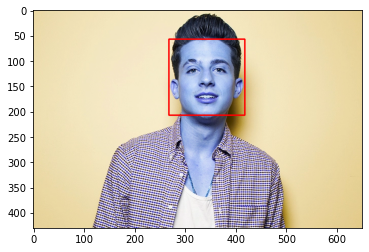

In [36]:
face_img = cv2.rectangle(img1,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

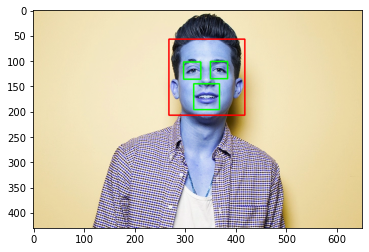

In [37]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img1,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray1[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

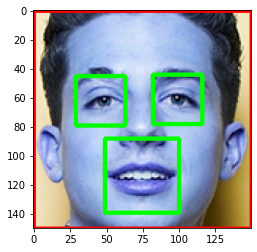

In [38]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [58]:
def get_cropped_image_if_2_eyes(image_path):
    img1 = cv2.imread(image_path)
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray1, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray1[y:y+h, x:x+w]
        roi_color = img1[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

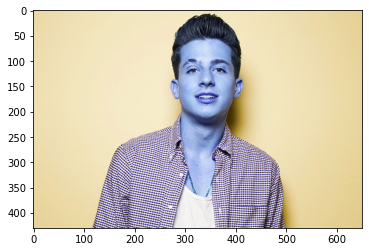

In [52]:
original_image = cv2.imread('./test_images/charlie-puth-2015-billboard-650_0.webp')
plt.imshow(original_image)

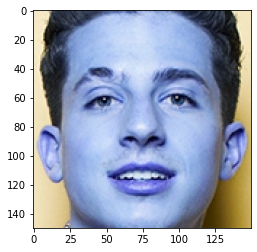

In [53]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/charlie-puth-2015-billboard-650_0.webp')
plt.imshow(cropped_image)

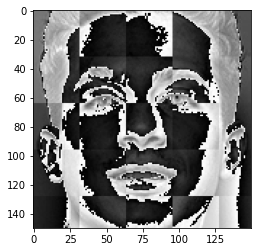

In [67]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

In [87]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [88]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [89]:
img_dirs

['./dataset/Charlie_Puth',
 './dataset/Ed_Sheeran',
 './dataset/Harry_Styles',
 './dataset/Selena_Gomez',
 './dataset/Taylor_Swift']

In [90]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [91]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  ./dataset/cropped/Charlie_Puth
Generating cropped images in folder:  ./dataset/cropped/Ed_Sheeran
Generating cropped images in folder:  ./dataset/cropped/Harry_Styles
Generating cropped images in folder:  ./dataset/cropped/Selena_Gomez
Generating cropped images in folder:  ./dataset/cropped/Taylor_Swift


In [92]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'Charlie_Puth': ['./dataset/cropped/Charlie_Puth\\Charlie_Puth1.png',
  './dataset/cropped/Charlie_Puth\\Charlie_Puth10.png',
  './dataset/cropped/Charlie_Puth\\Charlie_Puth11.png',
  './dataset/cropped/Charlie_Puth\\Charlie_Puth12.png',
  './dataset/cropped/Charlie_Puth\\Charlie_Puth13.png',
  './dataset/cropped/Charlie_Puth\\Charlie_Puth14.png',
  './dataset/cropped/Charlie_Puth\\Charlie_Puth15.png',
  './dataset/cropped/Charlie_Puth\\Charlie_Puth16.png',
  './dataset/cropped/Charlie_Puth\\Charlie_Puth17.png',
  './dataset/cropped/Charlie_Puth\\Charlie_Puth18.png',
  './dataset/cropped/Charlie_Puth\\Charlie_Puth19.png',
  './dataset/cropped/Charlie_Puth\\Charlie_Puth2.png',
  './dataset/cropped/Charlie_Puth\\Charlie_Puth20.png',
  './dataset/cropped/Charlie_Puth\\Charlie_Puth21.png',
  './dataset/cropped/Charlie_Puth\\Charlie_Puth22.png',
  './dataset/cropped/Charlie_Puth\\Charlie_Puth23.png',
  './dataset/cropped/Charlie_Puth\\Charlie_Puth24.png',
  './dataset/cropped/Charlie_Puth\

In [93]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'Charlie_Puth': 0,
 'Ed_Sheeran': 1,
 'Harry_Styles': 2,
 'Selena_Gomez': 3,
 'Taylor_Swift': 4}

In [94]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])    

In [95]:
len(X[0])

4096

In [96]:
X[0]

array([[255],
       [240],
       [229],
       ...,
       [244],
       [  1],
       [  3]], dtype=uint8)

In [97]:
y[0]

0

In [98]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(117, 4096)

In [99]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.6666666666666666

In [101]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         8
           1       1.00      1.00      1.00         3
           2       0.57      0.57      0.57         7
           3       0.67      0.86      0.75         7
           4       1.00      0.60      0.75         5

    accuracy                           0.67        30
   macro avg       0.75      0.71      0.71        30
weighted avg       0.69      0.67      0.67        30



In [102]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [103]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [104]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.677778,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.435294,{'randomforestclassifier__n_estimators': 5}
2,logistic_regression,0.711765,{'logisticregression__C': 1}


In [105]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=5))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [106]:
best_estimators['svm'].score(X_test,y_test)

0.7

In [107]:
best_estimators['random_forest'].score(X_test,y_test)

0.36666666666666664

In [108]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.7666666666666667

In [109]:
best_clf = best_estimators['logistic_regression']

In [110]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[4, 0, 3, 0, 1],
       [0, 3, 0, 0, 0],
       [2, 0, 5, 0, 0],
       [0, 0, 1, 6, 0],
       [0, 0, 0, 0, 5]], dtype=int64)

Text(69.0, 0.5, 'Truth')

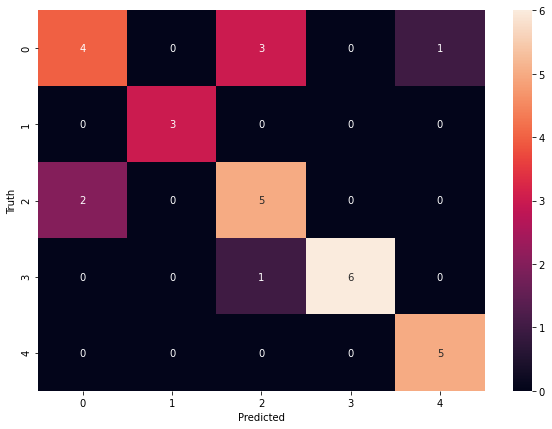

In [111]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [112]:
class_dict

{'Charlie_Puth': 0,
 'Ed_Sheeran': 1,
 'Harry_Styles': 2,
 'Selena_Gomez': 3,
 'Taylor_Swift': 4}

In [113]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

In [114]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))